In [1]:
import numpy as np
from numpy import zeros
from matplotlib import pyplot as plt


In [12]:

def polyModelWithNoise(x, theta, sigma):
    """
    Plots a sample of 100 points arranged between 0 and 1 for an nth order polynomial, with noise. For no noise, sigma = 0.
    
    Args:
        x: a numpy array of x values
        theta: a list of [theta1, ... , thetan], parameters of the polynomial
        sigma: the standard deviation of the noise distribution

    Returns:
        A numpy array of f(x, theta)
    """

    # initialise an empty array of length x
    y = zeros(len(x))

    # loop over all values of theta for all values of x
    for j in range(len(x)):
        x_temp = x[j]
        y_temp = zeros(len(theta))
        for i in range(len(theta)):
            y_temp[i] = theta[i] * (x[j] ** i)
        y[j] = sum(y_temp) + (sigma * np.random.randn())   # add noise

    # plot
    fig, ax = plt.subplots()
    ax.plot(x, y)

    return y


None


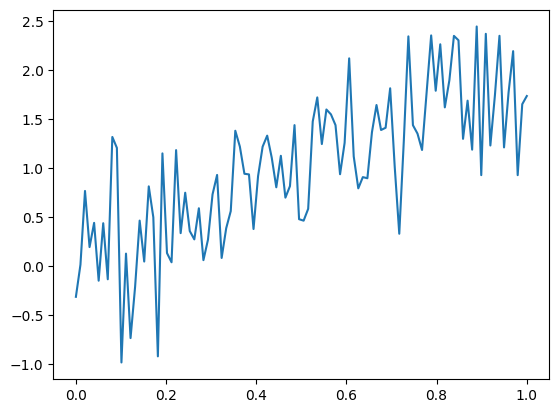

In [3]:
x = np.linspace(0, 1, 100)
theta = [0, 2]
sigma = 0.5
y = polyModelWithNoise(x, theta, sigma)
print(y)


In [27]:
def polyGradient(x, theta):
    """
    Returns the gradient of the nth order polynomial function with respect to theta.
    
    Args:
        x: a numpy array of x values
        theta: a list of [theta1, ... , thetan], parameters of the polynomial

    Returns:
        An n-dimensional array of the derivitives of each term in the polynomial
    """

    derivs = zeros((len(x), len(theta)))
    for i in range(len(x)):
        for j in range(len(theta)):
            derivs[i,j] = theta[j] * (x[i] ** (j-1)) * j

    return derivs

    

In [30]:
def get_new_theta(theta, eta, sigma, model_y, true_y):
    """
    Finds the new theta on the path using the gradient descent algorithm.

    Params:
        theta: a list of [theta1, ..., thetan], the parameters of the polynomial
        eta: the learning rate
        sigma: ??
        model_y: a numpy array of model y values
        true_y: a numpy array of true y values

    Returns:
        new_theta: a list of [theta1, ... , thetan], the new parameters of the polynomial
    """

    deviation = model_y - true_y
    grad_f = polyGradient(x, theta)
    new_theta = theta - eta * np.average(deviation[None,:] * grad_f, axis = 1)

    return new_theta

In [32]:
def stochastic_grad_desc(num_steps, start_theta, true_theta, true_sigma, eta):
    """
    Implements the stochastic gradient descent algorithm.
    
    Params:
        num_steps: the number of steps to take
        stat_theta: a list of [theta1, ..., thetan], the starting values for theta
        true_theta: a list of [theta1, ..., thetan], the values of theta for the true function
        true_sigma: the stadard deviation of the noise for the true function
        eta: the learning rate
    
    Returns:
        theta_path: the path taken to minimise the gradient of chi-sq
    """

    theta = start_theta
    theta_path = zeros((num_steps + 1, len(start_theta)))     # initialise empty path array
    theta_path[0] = theta                            # path starts at theta

    for i in range(num_steps):
        x = np.random.uniform(0, 1, 10)
        true_y = polyModelWithNoise(x, true_theta,  true_sigma)
        model_y = polyModelWithNoise(x, theta, 0)
        theta = get_new_theta(theta, eta, sigma, model_y, true_y)  # update theta
        theta_path[i+1] = theta  # update path with new theta

    return theta_path
    

ValueError: operands could not be broadcast together with shapes (1,10) (10,2) 

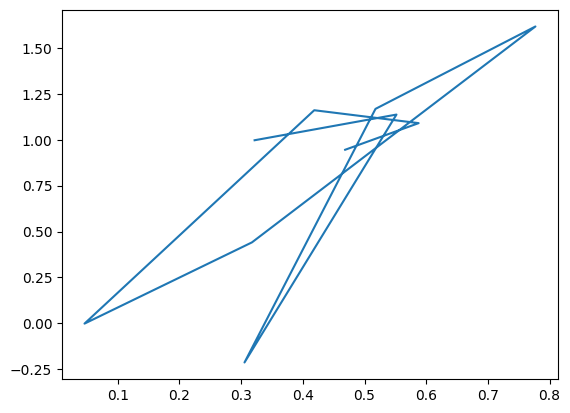

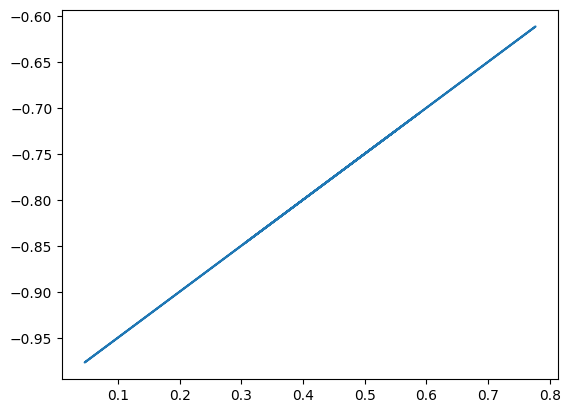

In [33]:
# Implement stochastic gradient descent algorithm

NUM_STEPS = 100
START_THETA = [-1, 0.5]
TRUE_THETA = [0, 2]
TRUE_SIGMA = 0.5
ETA = 0.5

path_pol_1 = stochastic_grad_desc(NUM_STEPS, START_THETA, TRUE_THETA, TRUE_SIGMA, ETA)